We consider the unperturbed network

$\dot{\Theta}_i = \omega + \frac{1}{N} \sum_{j=1}^N g(\Theta_i - \Theta_j)$,

where $g(\Phi) = -\sin(\Phi + \alpha) + r\sin(2\Phi)$.

The parameters are $N=5, \alpha=1.25, \omega=5, r=0.25$.

A stable orbit is defined by constant phase differences between, i.e. $\dot{\Theta_1}=\dot{\Theta_2}=...=\dot{\Theta_5}$.

Such a condition is satisfied for orbits $P_j^k$ in the set of permutations of $(0,0,0,\psi_j,\psi_j)$, where $k$ is an index identifying the permutation.

Plugging the requirement $\dot{\Theta_1}=\dot{\Theta_2}=...=\dot{\Theta_5}$ for any orbit $P_j^k$ into the differential equation for $\dot{\Theta_i}$ returns

$3g(0)+2g(-\psi_j) = 2g(0) + 3 g(\psi_j)$

and thus

$g(0) - 2\sin(1.25-\psi_j) + 3\sin(\psi_j +1.25)-1.25\sin(2\psi_j)$.

The $\psi_j \in (-2\pi, 2\pi)$ solving this are: $\{-5.096, -3.634, -0.695, 0, 1.187, 2.650, 5.588  \}$

 32%|███▏      | 1576/5000 [00:00<00:00, 7826.14it/s]

Starting value of phi is
[0.    0.    1.    1.339 1.339]


100%|██████████| 5000/5000 [00:00<00:00, 6874.13it/s]


Oscillators in first group:
[1 2]
Oscillators in second group:
[3 4 5]


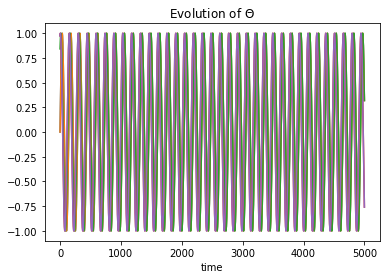

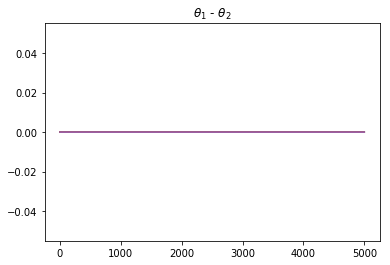

last value: 0.000000


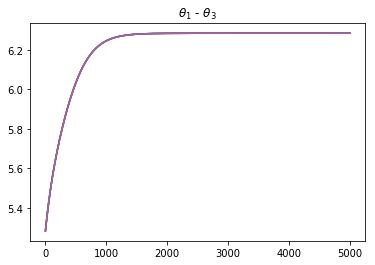

last value: 6.283185


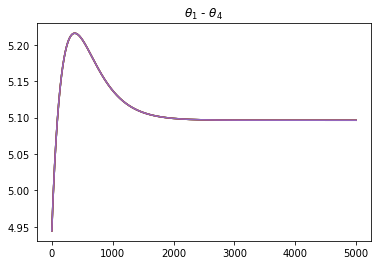

last value: 5.096360


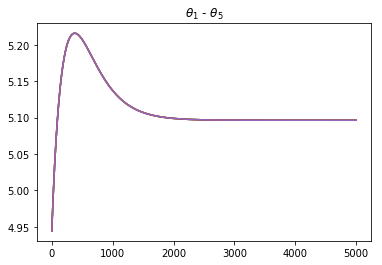

last value: 5.096360




Phase difference matrix after last iteration:
[[0.         0.         0.17753512 0.03623663 0.03623663]
 [0.         0.         0.17753512 0.03623663 0.03623663]
 [0.17753512 0.17753512 0.         0.19229971 0.19229971]
 [0.03623663 0.03623663 0.19229971 0.         0.        ]
 [0.03623663 0.03623663 0.19229971 0.         0.        ]]


Oscillators in first group:
[1 2]
Oscillators in second group:
[3 4 5]
Done


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

# Ashwin & Borresen: Discrete computation using a perturbed heteroclinic network, PLA 2005#

def g(phi):
    alpha = 1.25
    r = 0.25
    return -np.sin(phi + alpha) + r*np.sin(2*phi)

def phase_diffs(phi):
    phase_differences = np.zeros((5,5))
    for row in range(5):
        for col in range(5):
            phase_differences[row,col] = (phi[row]%(2*np.pi) - phi[col]%(2*np.pi))%(2*np.pi)
            
    return phase_differences

N = 5
omega = 5
timesteps = 5_000
dt = 0.01
    
# Define initial vector phi
# ================================== #
# Does not reach stationary state
#phi = np.zeros(N)+[0,3,0.5,1.339,2]
# ================================== #
# To reach stationary state:
# Ashwin: "For the parameter values used in this Letter the only attractor for the unperturbed system consists of twenty orbits with symmetry S2xS3"
# phi = np.random.uniform(low=-2*np.pi,high=2*np.pi,size=5)
#phi = np.concatenate((np.random.uniform(low=-2*np.pi,high=2*np.pi)*\
#np.ones(3),np.random.uniform(low=-2*np.pi,high=2*np.pi)*np.ones(2)))# phi = np.zeros(N)+[0,0,0.01,0.799+0.01,0.799-0.01]
phi = np.array([0,0,1,1.339,1.339])
# ================================== #

phi_hist = phi
phase_diff_hist = phase_diffs(phi).reshape(1,5,5)

print('Starting value of phi is')
print(phi)

for t in tqdm(range(timesteps)): 
    
    summation = 0*phi
    for angle in phi:
        summation += g(phi - angle)
    
    dphidt = omega + 1/N * summation
    
    phi = phi + dphidt*dt
    
    phi_hist = np.concatenate((phi_hist.reshape(5,-1),phi.reshape(5,1)),axis=1)
    phase_diff_hist = np.concatenate((phase_diff_hist,phase_diffs(phi).reshape(1,5,5)))

first_group=np.where(phase_diff_hist[-1,0,:] == 0)
second_group=np.where(phase_diff_hist[-1,0,:] != 0)
print('Oscillators in first group:')
print(first_group[0]+1)
print('Oscillators in second group:')
print(second_group[0]+1)
    
%matplotlib inline
plt.figure()

for i in range(N):
    plt.plot(np.sin(phi_hist[i,:]))

#plt.yscale('log')
plt.title(r'Evolution of $\Theta$')
plt.xlabel('time')
plt.show()

phase_differences_std = np.zeros((5,5))
for row in range(5):
    for col in range(5):
        phase_differences_std[row,col] = phase_diff_hist[:,row,col].std()

plt.figure()
for i in range(N):
    plt.plot(phase_diff_hist[:,0,1])
    
plt.title(r'$\theta_1$ - $\theta_2$')
plt.show()
print('last value: %f'%phase_diff_hist[-1,0,1])
        
plt.figure()
for i in range(N):
    plt.plot(phase_diff_hist[:,0,2])
    
plt.title(r'$\theta_1$ - $\theta_3$')
plt.show()
print('last value: %f'%phase_diff_hist[-1,0,2])
    
plt.figure()
for i in range(N):
    plt.plot(phase_diff_hist[:,0,3])
    
plt.title(r'$\theta_1$ - $\theta_4$')
plt.show()
print('last value: %f'%phase_diff_hist[-1,0,3])

plt.figure()
for i in range(N):
    plt.plot(phase_diff_hist[:,0,4])
    
plt.title(r'$\theta_1$ - $\theta_5$')
plt.show()
print('last value: %f'%phase_diff_hist[-1,0,4])
print('\n')
print('\n')
print('Phase difference matrix after last iteration:')
print(phase_differences_std)
print('\n')
print(r'Oscillators in first group:')
print(first_group[0]+1)
print('Oscillators in second group:')
print(second_group[0]+1)
print('Done')

<IPython.core.display.Javascript object>


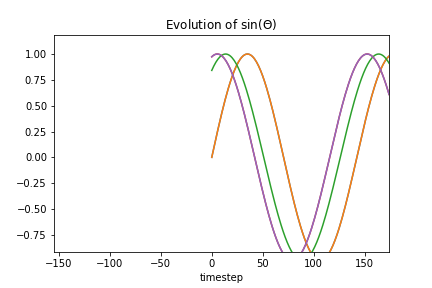

In [64]:
from importlib import reload
reload(plt)

%matplotlib notebook
%matplotlib notebook

plt.figure()

for i in range(N):
    plt.plot(np.sin(phi_hist[i,:]))

#plt.yscale('log')
plt.title(r'Evolution of sin($\Theta$)')
plt.xlabel('timestep')
plt.show()

  8%|▊         | 393/4999 [00:00<00:01, 3927.99it/s]

n=0


  8%|▊         | 399/4999 [00:00<00:01, 3987.46it/s]

n=1


  8%|▊         | 404/4999 [00:00<00:01, 4039.84it/s]

n=2


  8%|▊         | 400/4999 [00:00<00:01, 3999.17it/s]

n=3


  8%|▊         | 399/4999 [00:00<00:01, 3986.12it/s]

n=4


100%|██████████| 4999/4999 [00:01<00:00, 3875.37it/s]


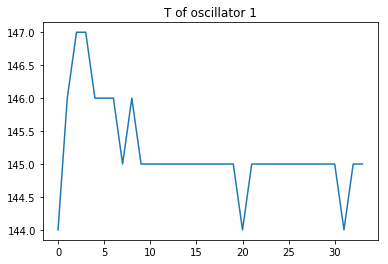

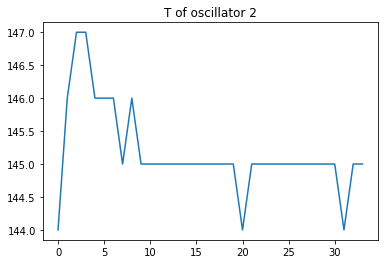

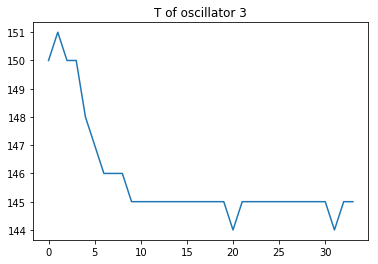

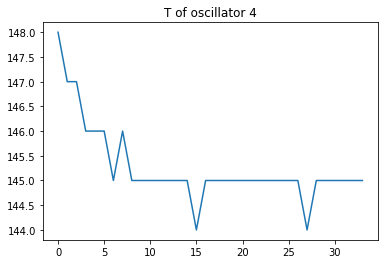

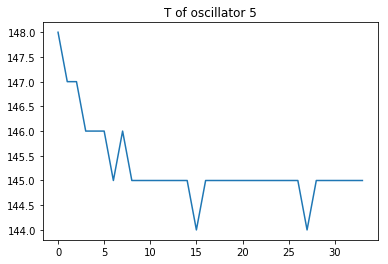

In [62]:
maxima = [[],[],[],[],[]]
for n in range(N):
    print("n=%d"%n)
    for idx in tqdm(range(1,np.sin(phi_hist[n,:]).shape[0]-1)):
        if (np.sin(phi_hist[n,:])[idx] >= np.sin(phi_hist[n,:])[idx-1]) and (np.sin(phi_hist[n,:])[idx] > np.sin(phi_hist[n,:])[idx+1]):
            #print('Max at %d'%idx)
            maxima[n].append(idx)
    
%matplotlib inline
            
for n in range(N):
    periods = np.diff(np.array(maxima[n]))
    plt.figure()
    plt.plot(periods)
    plt.title('T of oscillator %d'%(n+1))
    plt.show()

<IPython.core.display.Javascript object>


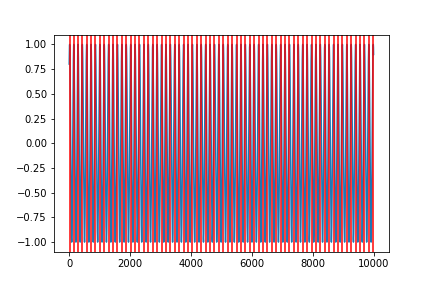

<IPython.core.display.Javascript object>


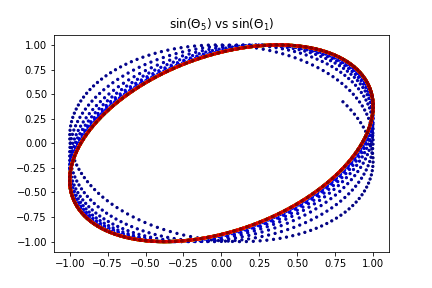

<IPython.core.display.Javascript object>


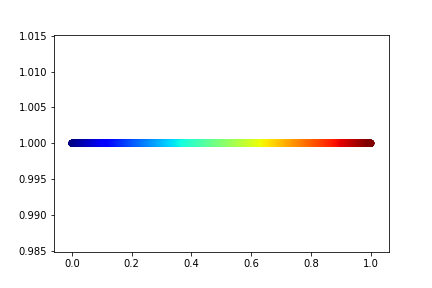

In [43]:
%matplotlib notebook
plt.figure()
plt.plot(test)
for line in maxima[0]:
    plt.axvline(x=line,color='r')
plt.show()

plt.figure()
t = np.linspace(0,1,phi_hist.shape[1])
plt.scatter(np.sin(phi_hist[0,:]),np.sin(phi_hist[4,:]),c=t,s=5, cmap ='jet')
plt.title(r'sin($\Theta_5$) vs sin($\Theta_1$)')
plt.show()

plt.figure()
plt.scatter(t,t*0+1,c=t,cmap='jet')
plt.show()